In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('tdrstyle.mplstyle')

%matplotlib inline

# Global variables
kDT, kCSC, kRPC, kGEM, kME0 = 0, 1, 2, 3, 4

num_emtf_hosts = 19

hostnames = [
  'ME1/1', 'ME1/2', 'ME1/3', 'ME2/1', 'ME2/2', 'ME3/1', 'ME3/2', 'ME4/1', 'ME4/2',
  'GE1/1', 'RE1/2', 'RE1/3', 'GE2/1', 'RE2/2*', 'RE3/1', 'RE3/2*', 'RE4/1', 'RE4/2*',
  'ME0',
]
assert(len(hostnames) == num_emtf_hosts)

histograms = {}

In [2]:
from rootpy.io import root_open
import rootpy.plotting.root2matplotlib as rplt

infile = 'histos_multiplicities.root'
infile_r = root_open(infile)

for i in xrange(num_emtf_hosts + 1):
  hname = "stub_mul_%i" % i
  histograms[hname] = infile_r.Get(hname)

  hname = "stub_mul_assoc_%i" % i
  histograms[hname] = infile_r.Get(hname)

  hname = "stub_mul_unass_%i" % i
  histograms[hname] = infile_r.Get(hname)

hname = "trk_mul_%i" % (0)
histograms[hname] = infile_r.Get(hname)

hname = "me0_mul_%i" % (0)
histograms[hname] = infile_r.Get(hname)

Welcome to JupyROOT 6.14/09


In [3]:
# Adjust matplotlib logging
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

# Customize matplotlib rcParams
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.facecolor'] = (0.98, 0.98, 0.98, 1)

In [4]:
# Functions
def find_percentile(hist, q):
  x, count = list(hist.xedgesl()), list(hist.y())
  x, count = np.array(x, dtype=np.int32), np.array(count, dtype=np.int32)
  a = np.repeat(x, count)
  return np.percentile(a, q)

### Assumptions

#### Stub multiplicities

- From MinBias PU200.
- Only counts one BX.
- Includes stubs in "neighbor" chamber.
- Excludes ME0 stubs beyond |eta| of 2.4.

#### Track multiplicities

- From MinBias PU200.
- Only counts one BX.
- Only counts SingleMu quality tracks: at least 3 stations, with at least 1 stub in the first station.

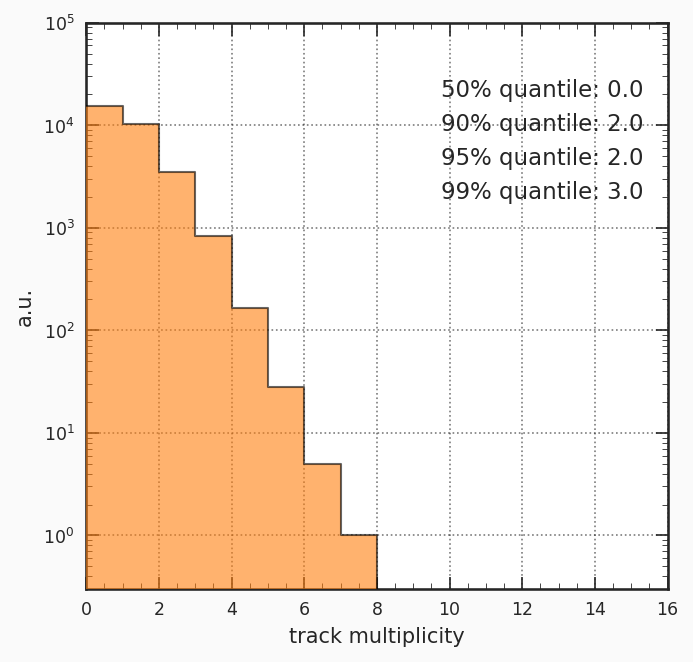

In [5]:
# Track multiplicity
fig, ax = plt.subplots(figsize=(5,5))

hname = 'trk_mul_%i' % (0)
color = 'C1'

h = histograms[hname]
rplt.hist(h, fill=True, facecolor=color, edgecolor='k', alpha=0.6, axes=ax)
ax.set_xlabel('track multiplicity')
ax.set_ylabel('a.u.')
ax.set_xlim(0, 16)
ax.set_ylim(0.3, 1e5)
ax.set_yscale('log')

q = [50, 90, 95, 99]
p = find_percentile(h, q)
ax.text(0.61, 0.87, '{:d}% quantile: {:.1f}'.format(q[0], p[0]), fontsize=11, transform=ax.transAxes)
ax.text(0.61, 0.81, '{:d}% quantile: {:.1f}'.format(q[1], p[1]), fontsize=11, transform=ax.transAxes)
ax.text(0.61, 0.75, '{:d}% quantile: {:.1f}'.format(q[2], p[2]), fontsize=11, transform=ax.transAxes)
ax.text(0.61, 0.69, '{:d}% quantile: {:.1f}'.format(q[3], p[3]), fontsize=11, transform=ax.transAxes)

plt.show()

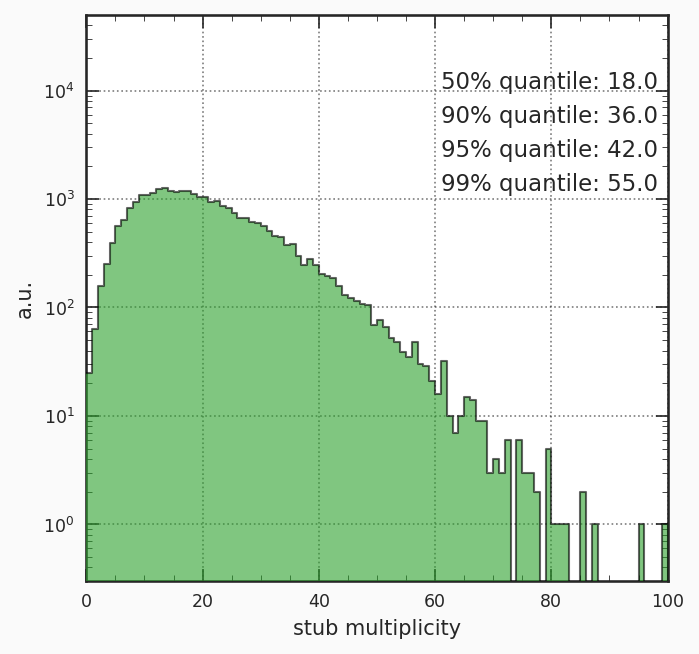

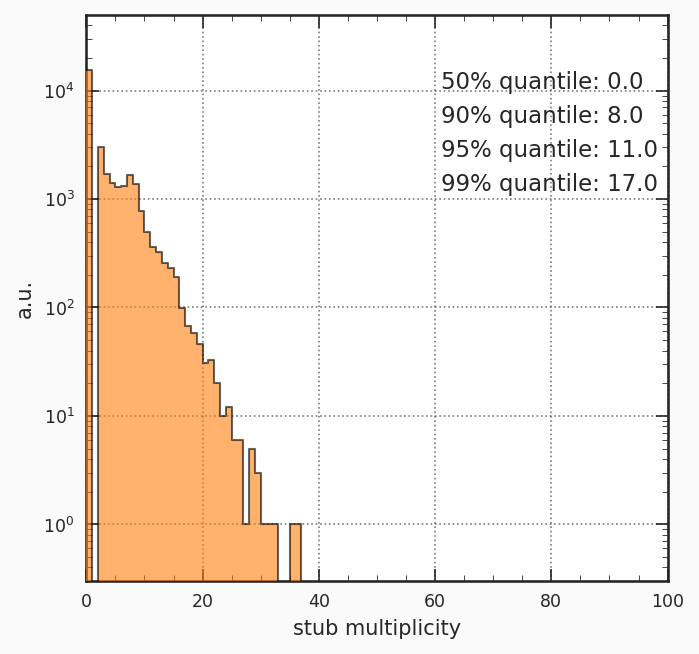

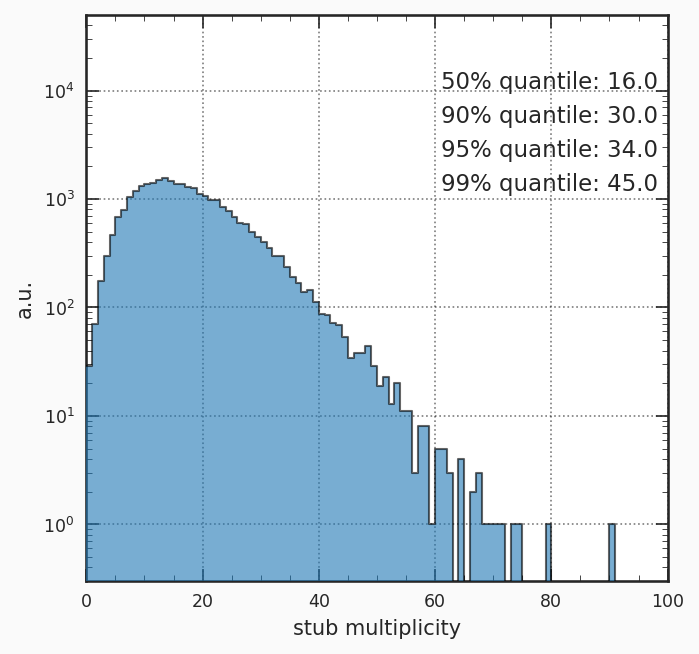

In [6]:
# Stub multiplicity
for j in xrange(3):
  if j == 0:
    hname = 'stub_mul_%i' % num_emtf_hosts
    color = 'C2'
  elif j == 1:
    hname = 'stub_mul_assoc_%i' % num_emtf_hosts
    color = 'C1'
  else:
    hname = 'stub_mul_unass_%i' % num_emtf_hosts
    color = 'C0'

  fig, ax = plt.subplots(figsize=(5,5))

  h = histograms[hname]
  rplt.hist(h, fill=True, facecolor=color, edgecolor='k', alpha=0.6, axes=ax)
  ax.set_xlabel('stub multiplicity')
  ax.set_ylabel('a.u.')
  #ax.set_xlim(0, 100)
  ax.set_ylim(0.3, 5e4)
  ax.set_yscale('log')

  q = [50, 90, 95, 99]
  p = find_percentile(h, q)
  ax.text(0.61, 0.87, '{:d}% quantile: {:.1f}'.format(q[0], p[0]), fontsize=11, transform=ax.transAxes)
  ax.text(0.61, 0.81, '{:d}% quantile: {:.1f}'.format(q[1], p[1]), fontsize=11, transform=ax.transAxes)
  ax.text(0.61, 0.75, '{:d}% quantile: {:.1f}'.format(q[2], p[2]), fontsize=11, transform=ax.transAxes)
  ax.text(0.61, 0.69, '{:d}% quantile: {:.1f}'.format(q[3], p[3]), fontsize=11, transform=ax.transAxes)

plt.show()

/cvmfs/cms.cern.ch/slc7_amd64_gcc700/external/py2-matplotlib/2.2.4-pafccj/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


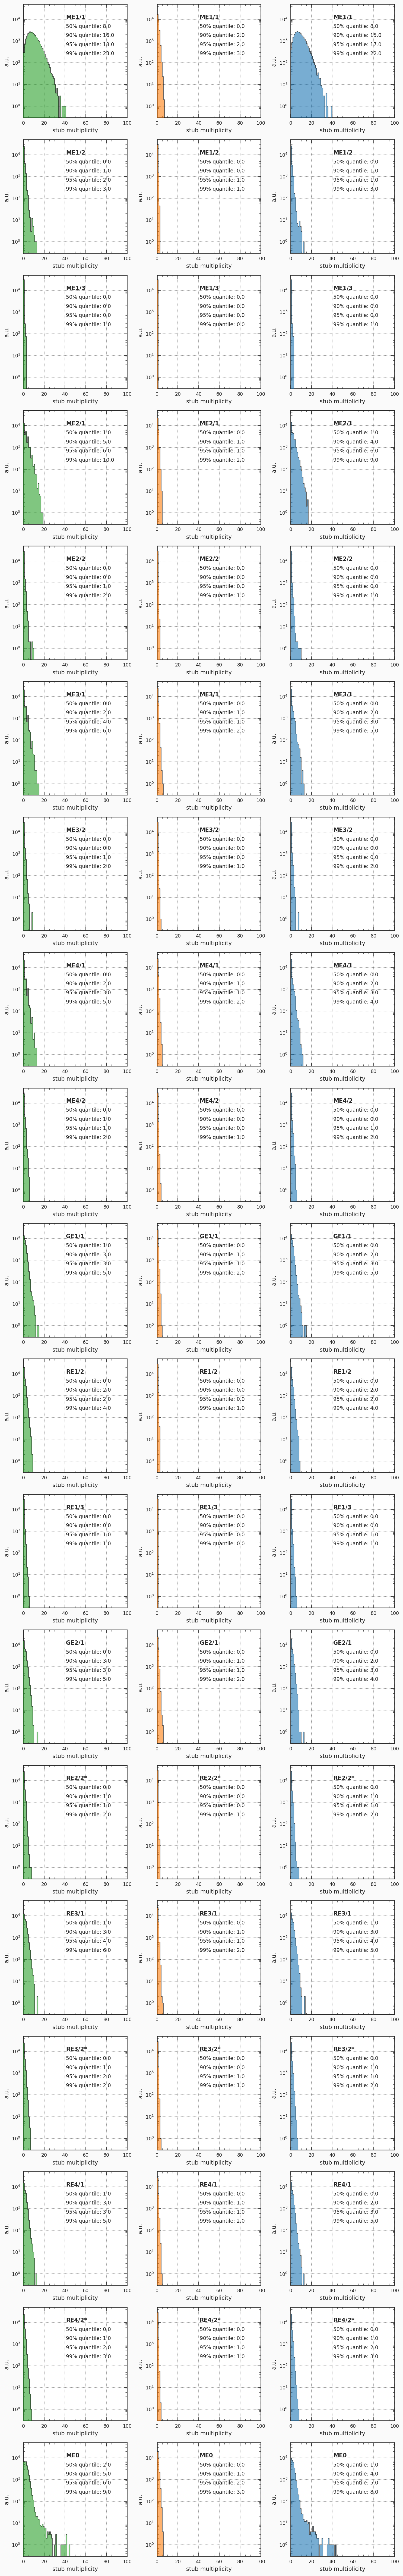

In [7]:
# Stub multiplicity (by station)
n = num_emtf_hosts
fig, axs = plt.subplots(n, 3, figsize=(10, 10*n/3.), tight_layout=True)

for j in xrange(3):
  if j == 0:
    hname = 'stub_mul_%i'
    color = 'C2'
  elif j == 1:
    hname = 'stub_mul_assoc_%i'
    color = 'C1'
  else:
    hname = 'stub_mul_unass_%i'
    color = 'C0'

  for i in xrange(num_emtf_hosts):
    ax = axs[i, j]
    h = histograms[(hname % i)]
    rplt.hist(h, fill=True, facecolor=color, edgecolor='k', alpha=0.6, axes=ax)
    ax.set_xlabel('stub multiplicity')
    ax.set_ylabel('a.u.')
    #ax.set_xlim(0, 100)
    ax.set_ylim(0.3, 5e4)
    ax.set_yscale('log')

    q = [50, 90, 95, 99]
    p = find_percentile(h, q)
    ax.text(0.41, 0.87, hostnames[i], fontsize=10, fontweight='bold', transform=ax.transAxes)
    ax.text(0.41, 0.79, '{:d}% quantile: {:.1f}'.format(q[0], p[0]), fontsize=9, transform=ax.transAxes)
    ax.text(0.41, 0.71, '{:d}% quantile: {:.1f}'.format(q[1], p[1]), fontsize=9, transform=ax.transAxes)
    ax.text(0.41, 0.63, '{:d}% quantile: {:.1f}'.format(q[2], p[2]), fontsize=9, transform=ax.transAxes)
    ax.text(0.41, 0.55, '{:d}% quantile: {:.1f}'.format(q[3], p[3]), fontsize=9, transform=ax.transAxes)

plt.show()

In [8]:
def get_stat_one(hname, s):
  q = 95
  h = histograms[hname]
  p = find_percentile(h, q)
  s = '|{:s}|{:.1f}|'.format(s, p)
  return s

def get_stat_three(hname0, hname1, hname2, s):
  q = 95
  h0 = histograms[hname0]
  p0 = find_percentile(h0, q)
  h1 = histograms[hname1]
  p1 = find_percentile(h1, q)
  h2 = histograms[hname2]
  p2 = find_percentile(h2, q)
  s = '|{:s}|{:.1f}|{:.1f}|{:.1f}|'.format(s, p0, p1, p2)
  return s

hname = 'trk_mul_%i' % (0)
print(get_stat_one(hname, 'track multiplicity'))

hname0 = 'stub_mul_%i' % num_emtf_hosts
hname1 = 'stub_mul_assoc_%i' % num_emtf_hosts
hname2 = 'stub_mul_unass_%i' % num_emtf_hosts
print(get_stat_three(hname0, hname1, hname2, 'stub multiplicity'))

for i in xrange(num_emtf_hosts):
  hname0 = 'stub_mul_%i' % i
  hname1 = 'stub_mul_assoc_%i' % i
  hname2 = 'stub_mul_unass_%i' % i
  print(get_stat_three(hname0, hname1, hname2, hostnames[i]))

|track multiplicity|2.0|
|stub multiplicity|42.0|11.0|34.0|
|ME1/1|18.0|2.0|17.0|
|ME1/2|2.0|1.0|1.0|
|ME1/3|0.0|0.0|0.0|
|ME2/1|6.0|1.0|6.0|
|ME2/2|1.0|0.0|0.0|
|ME3/1|4.0|1.0|3.0|
|ME3/2|1.0|0.0|0.0|
|ME4/1|3.0|1.0|3.0|
|ME4/2|1.0|0.0|1.0|
|GE1/1|3.0|1.0|3.0|
|RE1/2|2.0|0.0|2.0|
|RE1/3|1.0|0.0|1.0|
|GE2/1|3.0|1.0|3.0|
|RE2/2*|1.0|0.0|1.0|
|RE3/1|4.0|1.0|4.0|
|RE3/2*|2.0|1.0|1.0|
|RE4/1|3.0|1.0|3.0|
|RE4/2*|2.0|1.0|2.0|
|ME0|6.0|2.0|5.0|


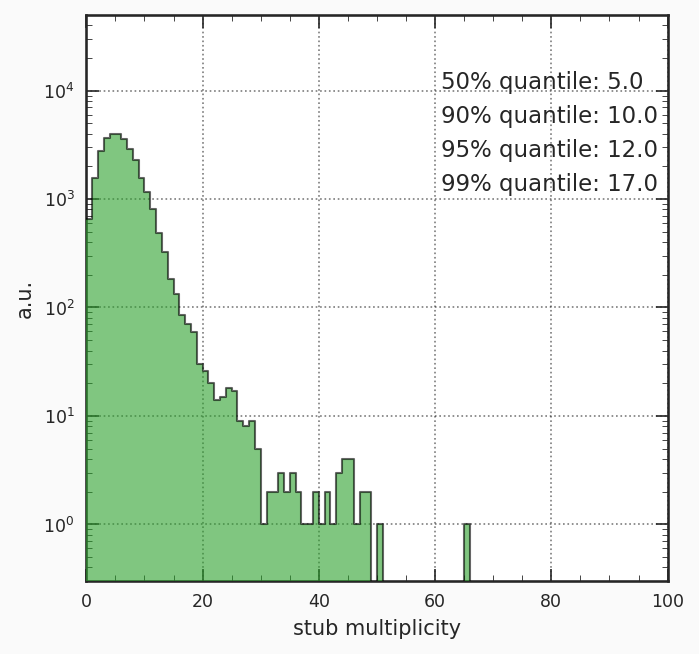

In [9]:
# Stub multiplicity (entire ME0)
fig, ax = plt.subplots(figsize=(5,5))

hname = 'me0_mul_%i' % (0)
color = 'C2'

h = histograms[hname]
rplt.hist(h, fill=True, facecolor=color, edgecolor='k', alpha=0.6, axes=ax)
ax.set_xlabel('stub multiplicity')
ax.set_ylabel('a.u.')
#ax.set_xlim(0, 100)
ax.set_ylim(0.3, 5e4)
ax.set_yscale('log')

q = [50, 90, 95, 99]
p = find_percentile(h, q)
ax.text(0.61, 0.87, '{:d}% quantile: {:.1f}'.format(q[0], p[0]), fontsize=11, transform=ax.transAxes)
ax.text(0.61, 0.81, '{:d}% quantile: {:.1f}'.format(q[1], p[1]), fontsize=11, transform=ax.transAxes)
ax.text(0.61, 0.75, '{:d}% quantile: {:.1f}'.format(q[2], p[2]), fontsize=11, transform=ax.transAxes)
ax.text(0.61, 0.69, '{:d}% quantile: {:.1f}'.format(q[3], p[3]), fontsize=11, transform=ax.transAxes)

plt.show()